Problem Statement :
company has collected past details of some employees
To predict salary of employee base on his/her experience

dataset has 2 columns:

1) YearsExperience--- Total years of experience
2) Salary --- employee salary(RS)
Simple Linear Regression:
Simple Linear Regression is a statistical method here I am using to get relationship between two variables x and y.
Then with help bestfit line we can find predicted salary of employee base on their experience

Bestfit line -- line with min sum of residual

X -- Dependent variables
Y -- Independent variable
Y = f(X)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

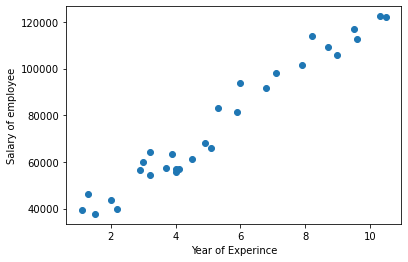

In [8]:
plt.scatter(x = df['YearsExperience'], y = df['Salary'])
plt.xlabel("Year of Experince")
plt.ylabel("Salary of employee")
plt.show()

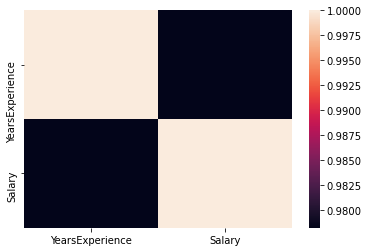

In [10]:
#correlation between salary and Experince
sns.heatmap(df.corr())
plt.show()

In [12]:
df.corr().round(3)

,YearsExperience,Salary
YearsExperience,1.000,0.978
Salary,0.978,1.000


As seen here salary and Experince has strong positive correlation
salary linearly increases with increasing experience

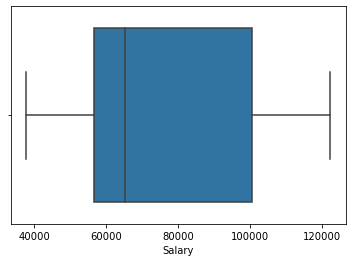

In [13]:
sns.boxplot('Salary', data=df)
plt.show()

In [14]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


X (depended variable) -- Salary
Y (Independed variable) -- YearsExperience¶

In [36]:
import statsmodels.formula.api as smf

In [40]:
model1 = smf.ols('Salary~YearsExperience', data =df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.14e-20
Time:                        12:05:29   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model2 = smf.ols('Salary~np.log(YearsExperience)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           3.25e-13
Time:                        12:08:34   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model3 = smf.ols('Salary~np.exp(YearsExperience)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           2.72e-05
Time:                        12:10:24   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(YearsExperience)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [46]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [47]:
model3.params

Intercept                  67568.624969
np.exp(YearsExperience)        2.136040
dtype: float64

In [48]:
model1.conf_int(0.05)

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


# Fitting a Linear Regression Model

In [49]:
pred = model1.predict(df)

Text(0, 0.5, 'Salary')

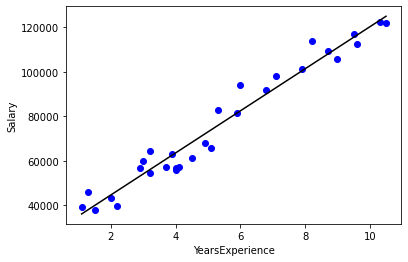

In [50]:
plt.scatter(x=df.YearsExperience, y = df.Salary, color = 'blue')
plt.plot(df.YearsExperience, pred, color = 'black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

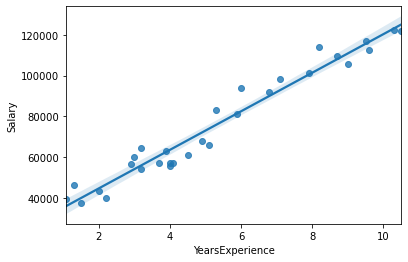

In [51]:
sns.regplot(x = 'YearsExperience', y='Salary', data=df)